# Bài 1:

In [42]:
import numpy as np
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2, 1.6],
                 [1, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# 1.1 Tính trung bình từng chiều
means = np.mean(data, axis=0)
print("Trung bình từng chiều:")
print(means)


Trung bình từng chiều:
[1.81 1.91]


In [43]:

# 1.2 Chuẩn hóa dữ liệu
normalized_data = (data - means) / np.std(data, axis=0)
print("\nDữ liệu chuẩn hóa:")
print(normalized_data)



Dữ liệu chuẩn hóa:
[[ 0.92627881  0.61016865]
 [-1.7585873  -1.506743  ]
 [ 0.52354889  1.23278973]
 [ 0.12081898  0.36112022]
 [ 1.73173864  1.35731394]
 [ 0.6577922   0.9837413 ]
 [ 0.25506228 -0.38602507]
 [-1.08737078 -1.00864614]
 [-0.41615425 -0.38602507]
 [-0.95312747 -1.25769457]]


In [44]:

# 1.3 Tính ma trận hiệp phương sai
cov_matrix = np.cov(normalized_data.T)
print("\nMa trận hiệp phương sai:")
print(cov_matrix)



Ma trận hiệp phương sai:
[[1.11111111 1.0288103 ]
 [1.0288103  1.11111111]]


In [45]:

# 1.4 Tính giá trị riêng và vector riêng
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("\nCác giá trị riêng:")
print(eigen_values)
print("\nCác vector riêng tương ứng:")
print(eigen_vectors)



Các giá trị riêng:
[2.13992141 0.08230081]

Các vector riêng tương ứng:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [46]:

# 1.5 Giảm chiều dữ liệu xuống còn 1 chiều
reduced_data = normalized_data.dot(eigen_vectors[:, 0])
print("\nDữ liệu giảm chiều:")
print(reduced_data)



Dữ liệu giảm chiều:
[ 1.08643242 -2.3089372   1.24191895  0.34078247  2.18429003  1.16073946
 -0.09260467 -1.48210777 -0.56722643 -1.56328726]


In [47]:

# 1.6 Chuyển dữ liệu qua hệ trục mới và in kết quả
new_data = reduced_data.reshape(-1, 1).dot(eigen_vectors[:, 0].reshape(1, -1)) * np.std(data, axis=0) + means
print("\nDữ liệu sau khi chuyển qua hệ trục mới:")
print(new_data)



Dữ liệu sau khi chuyển qua hệ trục mới:
[[2.38226223 2.52692718]
 [0.59380144 0.59887738]
 [2.46416246 2.61521971]
 [1.98950213 2.10351224]
 [2.96054251 3.15034213]
 [2.42140237 2.5691222 ]
 [1.76122186 1.85741473]
 [1.02932162 1.06838983]
 [1.51122186 1.58790228]
 [0.98656153 1.02229232]]


# Bài 2:

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

reduced_data = pca.fit_transform(data)

original_data = pca.inverse_transform(reduced_data)

# In kết quả
print("Dữ liệu giảm chiều:")
print(reduced_data)
print("\nDữ liệu sau khi chuyển qua hệ trục mới:")
print(original_data)


Dữ liệu giảm chiều:
[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]

Dữ liệu sau khi chuyển qua hệ trục mới:
[[2.37125896 2.51870601]
 [0.60502558 0.60316089]
 [2.48258429 2.63944242]
 [1.99587995 2.11159364]
 [2.9459812  3.14201343]
 [2.42886391 2.58118069]
 [1.74281635 1.83713686]
 [1.03412498 1.06853498]
 [1.51306018 1.58795783]
 [0.9804046  1.01027325]]


# Bài 3:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv(url, names=column_names)
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### Không có dữ liệu nào bị thiếu . Dữ liệu sạch.

In [51]:

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(124, 13) (54, 13)
(124,) (54,)


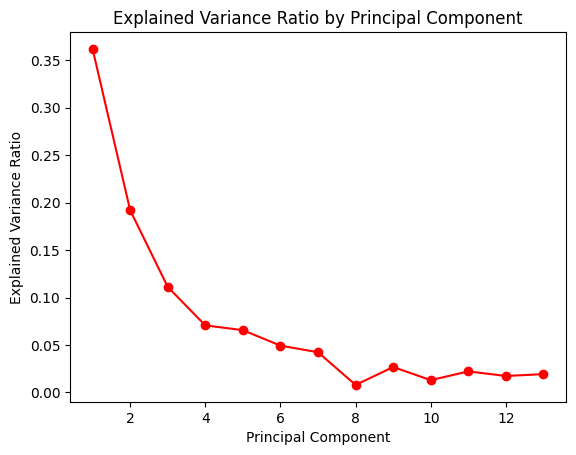

In [52]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cov_matrix = np.cov(X_scaled.T)
eigen_values = np.linalg.eigvals(cov_matrix)
explained_variance_ratio = eigen_values / np.sum(eigen_values)
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o',color='r')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# PCA

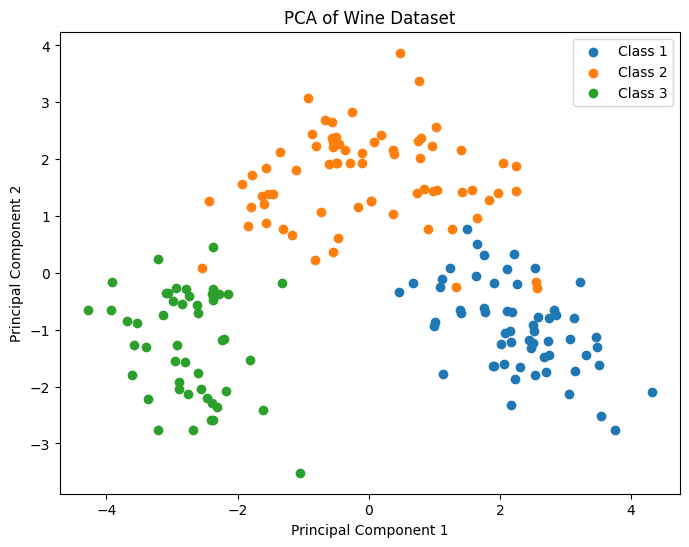

In [53]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(X_pca[y == class_label, 0], X_pca[y == class_label, 1], label=f'Class {class_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()

In [61]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((124, 2), (54, 2))

# SVD

In [65]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)
X_train_svd.shape, X_test_svd.shape

((124, 2), (54, 2))

# CUR

In [66]:
# Em kiếm không ra tài liệu liên quan đến CUR thầy ạ 

# Train thử với PCA với logisticRegression

In [62]:

# 3.8 Huấn luyện mô hình Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)


LogisticRegression()

In [63]:

# 3.9 Phân loại dữ liệu trên tập Train chỉ với dữ liệu 2 chiều
train_predictions = log_reg.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on Train Data (2D PCA):", train_accuracy)


Accuracy on Train Data (2D PCA): 0.7016129032258065


In [64]:

# 3.10 Phân loại dữ liệu trên tập Test chỉ với dữ liệu 2 chiều
test_predictions = log_reg.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on Test Data (2D PCA):", test_accuracy)


Accuracy on Test Data (2D PCA): 0.6851851851851852


# Train thử với SVD với mô hình logisticRegression

In [67]:
log_reg_v2 = LogisticRegression()
log_reg_v2.fit(X_train_svd, y_train)

LogisticRegression()

In [68]:
train_predictions_v2 = log_reg_v2.predict(X_train_svd)
train_accuracy_v2 = accuracy_score(y_train, train_predictions_v2)
print("Accuracy on Train Data (2D SVD):", train_accuracy_v2)

Accuracy on Train Data (2D SVD): 0.6854838709677419


In [69]:
test_predictions_v2 = log_reg_v2.predict(X_test_svd)
test_accuracy_v2 = accuracy_score(y_test, test_predictions_v2)
print("Accuracy on Test Data (2D SVD):", test_accuracy_v2)

Accuracy on Test Data (2D SVD): 0.7037037037037037


# Train thử với data gốc

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200,300, 400],
}

LogisticRegression_model = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
LogisticRegression_model.fit(X_train, y_train)
print(LogisticRegression_model.best_params_)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'C': 206.913808111479, 'max_iter': 100, 'solver': 'newton-cg'}


In [59]:
predeic_model = LogisticRegression_model.predict(X_test)
accuracy_score(y_test, predeic_model)

1.0

In [60]:
predeic_model_xtrain = LogisticRegression_model.predict(X_train)
accuracy_score(y_train, predeic_model_xtrain)


1.0

# END